# OilyGiant Machine Learning Analysis

**The objective of this is analysis is to create a model that will help OilyGiant pick the region with the highest profit margin. Potential profit and risks will be analyzed using the Bootstrapping technique. There will be 5 main steps followed in order to achieve the objective:**

1) Download and prepare the data. Explain the procedure

2) Train and test the model for each region

3) Prepare for profit calculation

4) Write a function to calculate profit from a set of selected oil wells and model predictions

5) Calculate risks and profit for each region

**Conditions:**

a) **Only linear regression** is suitable for model training (the rest are not sufficiently predictable).

b) When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.

c) The budget for development of 200 oil wells is 100 USD million.

d) One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

e) After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

In [1]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
#library import cell
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

## Download and prepare the data

1.1 Make sure data is readable and study the data

1.2 View the distribution and make note of any outliers

1.3 Remove outliers

### Make sure data is readable and study the data

In [3]:
#download and read the data
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')
try:
    display(data_1.head(10), data_2.head(10), data_3.head(10))
except:
    display('cannot read csvs')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [4]:
#investigate the df attributes
display(data_1.info(), data_2.info(), data_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8

None

None

None

#### Conclusion: Opening the data

1) Data is readable and non-corrupt

2) There are equal amounts of entries throughout all three dataframes and only 4 columns

3) id is not needed for calculations

### View the distribution and make note of any outliers

In [5]:
display(data_1['id'].value_counts(), data_2['id'].value_counts(), data_3['id'].value_counts())

bxg6G    2
AGS9W    2
HZww2    2
fiKDv    2
A5aEY    2
        ..
j6PVi    1
uALPr    1
YuGJS    1
SkLPN    1
YI6vJ    1
Name: id, Length: 99990, dtype: int64

bfPNe    2
wt4Uk    2
LHZR0    2
5ltQ6    2
2cW56    1
        ..
c8vE3    1
HPKLW    1
CoCKF    1
3PTKo    1
mGq6S    1
Name: id, Length: 99996, dtype: int64

VF7Jo    2
KUPhW    2
xCHr8    2
Vcm5J    2
B5jWB    1
        ..
lEnRH    1
U4Adn    1
E3WHi    1
8RHNe    1
WJkl0    1
Name: id, Length: 99996, dtype: int64

In [6]:
#The wells will be identified via their indexes rather than id number
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)
data_3 = data_3.drop('id', axis=1)
display(data_1.head())

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


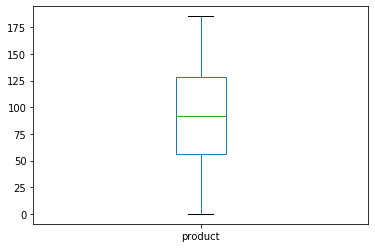

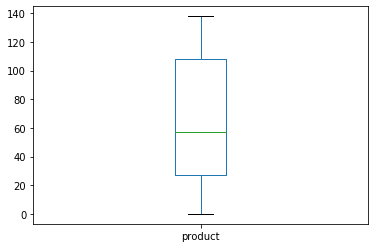

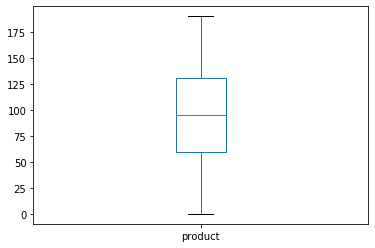

In [7]:
#using boxplots to get a general understanding of the distribution

data_1['product'].plot.box(by=None)
plt.show()
data_2['product'].plot.box(by=None)
plt.show()
data_3['product'].plot.box(by=None)
plt.show()
#No apparant outliers with the target variable

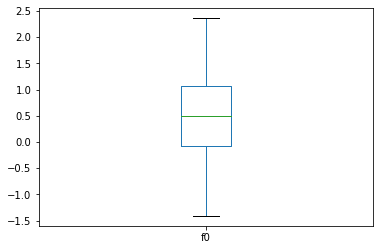

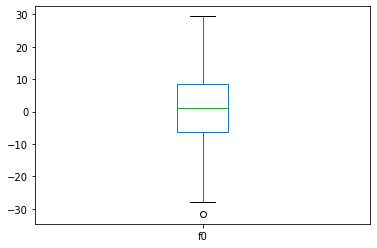

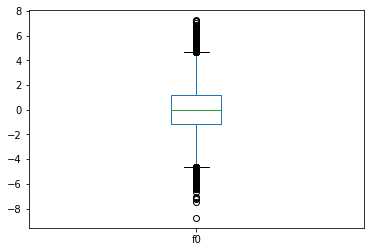

In [8]:
data_1['f0'].plot.box(by=None)
plt.show()
data_2['f0'].plot.box(by=None)
plt.show()
data_3['f0'].plot.box(by=None)
plt.show()
#outliers are found in the f0 feature for region 3

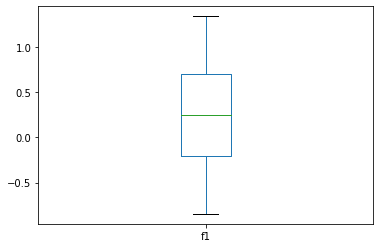

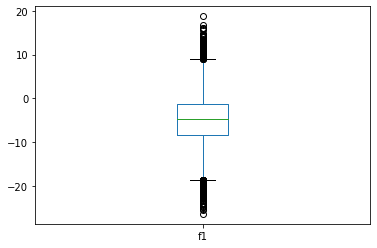

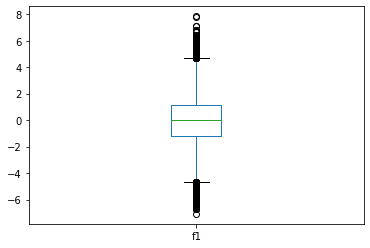

In [9]:
data_1['f1'].plot.box(by=None)
plt.show()
data_2['f1'].plot.box(by=None)
plt.show()
data_3['f1'].plot.box(by=None)
plt.show()
#Regions 2 and 3 have outliers in the f1 feature

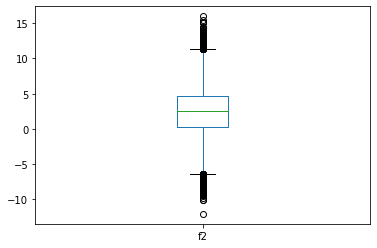

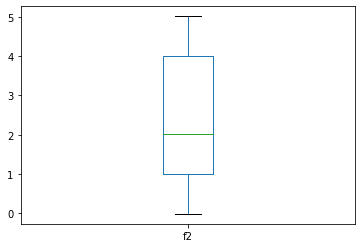

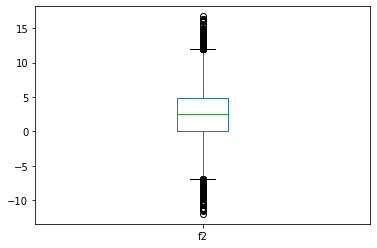

In [10]:
data_1['f2'].plot.box(by=None)
plt.show()
data_2['f2'].plot.box(by=None)
plt.show()
data_3['f2'].plot.box(by=None)
plt.show()
#Outliers in region 1 and 3 f2 need to be removed

### Remove Outliers

In [11]:
R1Q1 = data_1.quantile(0.25)
R1Q3 = data_1.quantile(0.75)
R1_IQR = R1Q3 - R1Q1

display(R1_IQR, data_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


f0          1.146162
f1          0.901528
f2          4.427340
product    72.066582
dtype: float64

None

In [12]:
R2Q1 = data_2.quantile(0.25)
R2Q3 = data_2.quantile(0.75)
R2_IQR = R2Q3 - R2Q1

display(R2_IQR, data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


f0         14.919567
f1          6.935169
f2          2.999883
product    80.859783
dtype: float64

None

In [13]:
R3Q1 = data_3.quantile(0.25)
R3Q3 = data_3.quantile(0.75)
R3_IQR = R3Q3 - R3Q1

display(R3_IQR, data_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


f0          2.320824
f1          2.338497
f2          4.728435
product    71.144586
dtype: float64

None

In [14]:
#Removing region 1 outliers
data_1 = data_1[~((data_1 < (R1Q1 - 1.5 * R1_IQR)) | (data_1 > (R1Q3 + 1.5 * R1_IQR))).any(axis=1)]
data_2 = data_2[~((data_2 < (R2Q1 - 1.5 * R2_IQR)) | (data_2 > (R2Q3 + 1.5 * R2_IQR))).any(axis=1)]
data_3 = data_3[~((data_3 < (R3Q1 - 1.5 * R3_IQR)) | (data_3 > (R3Q3 + 1.5 * R3_IQR))).any(axis=1)]

display(data_1.info(), data_2.info(), data_3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99494 entries, 0 to 99999
Data columns (total 4 columns):
f0         99494 non-null float64
f1         99494 non-null float64
f2         99494 non-null float64
product    99494 non-null float64
dtypes: float64(4)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99363 entries, 0 to 99999
Data columns (total 4 columns):
f0         99363 non-null float64
f1         99363 non-null float64
f2         99363 non-null float64
product    99363 non-null float64
dtypes: float64(4)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98004 entries, 0 to 99999
Data columns (total 4 columns):
f0         98004 non-null float64
f1         98004 non-null float64
f2         98004 non-null float64
product    98004 non-null float64
dtypes: float64(4)
memory usage: 3.7 MB


None

None

None

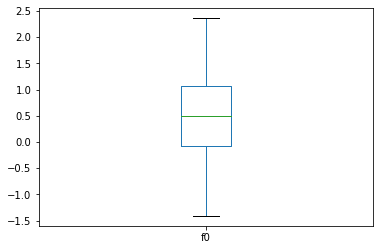

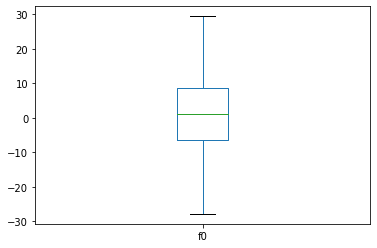

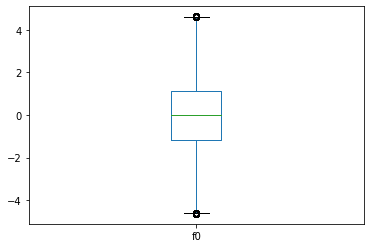

In [15]:
#Redisplay the distributions
data_1['f0'].plot.box(by=None)
plt.show()
data_2['f0'].plot.box(by=None)
plt.show()
data_3['f0'].plot.box(by=None)
plt.show()
#Distribution for this feature looks better

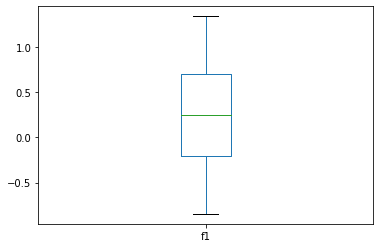

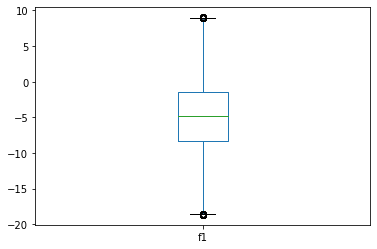

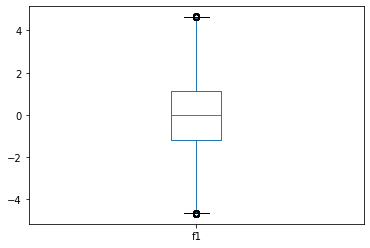

In [16]:
data_1['f1'].plot.box(by=None)
plt.show()
data_2['f1'].plot.box(by=None)
plt.show()
data_3['f1'].plot.box(by=None)
plt.show()
#f1 distribution looks better

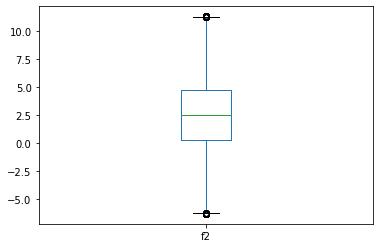

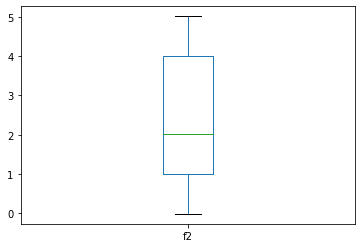

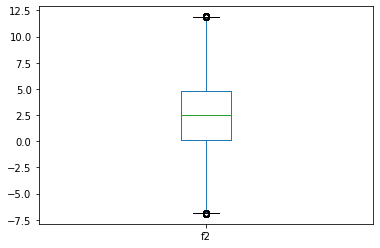

In [17]:
data_1['f2'].plot.box(by=None)
plt.show()
data_2['f2'].plot.box(by=None)
plt.show()
data_3['f2'].plot.box(by=None)
plt.show()
#f1 distribution looks better

### Conclusion: Data Preparation

1) After opening and reading the data, outliers were observed and processed

2) This should help the model in minimizing RMSE

3) The objective is to choose the best region -- df's were left unmerged since each df corresponds to a specific region

## Train and test the model for each region

2.1. Split the data into a training set and validation set at a ratio of 75:25.

2.2. Train the model and make predictions for the validation set. Save the predictions and correct answers for the validation set.

2.3. Print the average volume of predicted reserves and model RMSE.

2.4. Analyze the results.

### Split the data into a training set and validation set at a ratio of 75:25

In [18]:
features_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']

features_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']

features_3 = data_3.drop('product', axis=1)
target_3 = data_3['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, 
                                                                          train_size=0.75, random_state=12345)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, 
                                                                          train_size=0.75, random_state=12345)

features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(features_3, target_3, 
                                                                          train_size=0.75, random_state=12345)
display(features_train_1.shape, target_train_1.shape, 
        features_valid_1.shape, target_valid_1.shape,
        features_train_2.shape, target_train_2.shape, 
        features_valid_2.shape, target_valid_2.shape,
        features_train_3.shape, target_train_3.shape, 
        features_valid_3.shape, target_valid_3.shape,)

(74620, 3)

(74620,)

(24874, 3)

(24874,)

(74522, 3)

(74522,)

(24841, 3)

(24841,)

(73503, 3)

(73503,)

(24501, 3)

(24501,)

#### Conclusion: Splitting the data

1) Each region was split into their own respective train and validation sets

2) A 75:25 split was achieved for each region

### Train the model and make predictions for the validation set & Save the predictions and correct answers for the validation set

In [19]:
target_valid_1.head()

56175     50.715131
4782      42.686826
78065     51.690622
90955     57.925589
68378    104.234228
Name: product, dtype: float64

In [20]:
#Region 1
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
preds_1 = model_1.predict(features_valid_1)
preds_1 = pd.DataFrame(preds_1)
target_valid_1 = pd.DataFrame(target_valid_1).reset_index(drop=True)

#merging predictions and target
key_1 = preds_1.merge(target_valid_1, left_index=True, right_index=True, how='outer'
                     ).rename(columns={0: 'predictions', 'product': 'answers'})

#Region 2
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
preds_2 = model_2.predict(features_valid_2)
preds_2 = pd.DataFrame(preds_2)
target_valid_2 = pd.DataFrame(target_valid_2).reset_index(drop=True)

key_2 = preds_2.merge(target_valid_2, left_index=True, right_index=True, how='outer'
                     ).rename(columns={0: 'predictions', 'product': 'answers'})

#Region 3
model_3 = LinearRegression()
model_3.fit(features_train_3, target_train_3)
preds_3 = model_3.predict(features_valid_3)
preds_3 = pd.DataFrame(preds_3)
target_valid_3 = pd.DataFrame(target_valid_3).reset_index(drop=True)

key_3 = preds_3.merge(target_valid_3, left_index=True, right_index=True, how='outer'
                     ).rename(columns={0: 'predictions', 'product': 'answers'})

display(key_1.head(), key_1.info(), 
        key_2.head(), key_2.info(), 
        key_3.head(), key_3.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24874 entries, 0 to 24873
Data columns (total 2 columns):
predictions    24874 non-null float64
answers        24874 non-null float64
dtypes: float64(2)
memory usage: 583.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24841 entries, 0 to 24840
Data columns (total 2 columns):
predictions    24841 non-null float64
answers        24841 non-null float64
dtypes: float64(2)
memory usage: 582.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24501 entries, 0 to 24500
Data columns (total 2 columns):
predictions    24501 non-null float64
answers        24501 non-null float64
dtypes: float64(2)
memory usage: 574.2 KB


,predictions,answers
0,81.908532,50.715131
1,73.007669,42.686826
2,101.278165,51.690622
3,82.103895,57.925589
4,85.599147,104.234228


None

,predictions,answers
0,54.249394,53.906522
1,111.016318,110.992147
2,2.796261,3.179103
3,82.992962,80.859783
4,57.151853,57.085625


None

,predictions,answers
0,97.777767,141.637354
1,107.805181,134.169483
2,68.022056,80.090879
3,57.257695,30.313638
4,109.372511,52.362387


None

#### Conclusion: Predictions and Answers for Each Region

1) Predictions for each model's validation set have been made

2) Target validation answers were compiled with the predictions in one variable 'key' for each region

### Print the average volume of predicted reserves and model RMSE

In [21]:
#Average volume 
avg_1 = preds_1.mean()
avg_1 = list(avg_1) #to remove dtype info message from outputs
avg_2 = preds_2.mean()
avg_2 = list(avg_2)
avg_3 = preds_3.mean()
avg_3 = list(avg_3)

#RMSE
RMSE_1 = mean_squared_error(target_valid_1, preds_1)**0.5
RMSE_2 = mean_squared_error(target_valid_2, preds_2)**0.5
RMSE_3 = mean_squared_error(target_valid_3, preds_3)**0.5

print('Average 1:', avg_1, 'RMSE 1:', RMSE_1)
print('Average 2:', avg_2, 'RMSE 2:', RMSE_2)
print('Average 3:', avg_3, 'RMSE 3:', RMSE_3)

Average 1: [92.72476770114889] RMSE 1: 37.922930890531454
Average 2: [68.57155922956488] RMSE 2: 0.8890307022067047
Average 3: [94.69860451155928] RMSE 3: 40.116670311801556


#### Conclusion: Average Volume and RMSEs

1) The average volumes for regions 1 and 3 (92 and 94) were much more similar than region 2 (68)

2) RMSEs for regions 1 and 3 were also similar (37, 40) and also not ideal for a model

3) Region 2's RMSE was much more ideal than the other two (0.9)

## Prepare for profit calculation

3.1 Store all key values for calculations in separate variables.

3.2 Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

3.3 Provide the findings about the preparation for profit calculation step.

### Store all key values for calculations in separate variables

In [22]:
dev_budget = 100000000 #100 million used
well_budget = 200 #max wells for budget
barrel_rev = 4.5 #usd/1 barrel
unit = 1000 #number of barrels
unit_rev = 4500 #usd/1 unit
cost_of_goods = dev_budget/well_budget

#revenue = unit_rev * (unit * predictions[i]) #x = the number of predicted units for a well

#net_profit = revenue - cost_of_goods #no known operating expenses or taxes/loans provided

display(cost_of_goods)

500000.0

#### Conclusion: Calculation Variables

1) All key values for calculation have been stored as variables

2) The cost for creating a single well is $500,000 USD

3) net_profit is the profit gained from a single well

### Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [23]:
#Reserves needed to offset costs
offset = cost_of_goods/unit_rev #cost of a well/revenue of one unit

print('Region 1 average volume:', avg_1, 'Units needed to offset:', int(offset))
print('Region 2 average volume:', avg_2, 'Units needed to offset:', int(offset))
print('Region 3 average volume:', avg_3, 'Units needed to offset:', int(offset))

Region 1 average volume: [92.72476770114889] Units needed to offset: 111
Region 2 average volume: [68.57155922956488] Units needed to offset: 111
Region 3 average volume: [94.69860451155928] Units needed to offset: 111


#### Conclusion: Offset Calculations

1) The average volume produced in each region is insufficient to offset the costs of creating a single well 

2) Example: 92 units are estimated to be made for region 1, however, 111 are needed at minimum to break even for the cost of producing the well 

## Write a function to calculate profit from a set of selected oil wells and model predictions:

4.1 Pick the wells with the highest values of predictions. Summarize the target volume of reserves in accordance with these predictions

4.2 Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves

### Pick the wells with the highest values of predictions. Summarize the target volume of reserves in accordance with these predictions

In [24]:
#the wells are identified via index, therefore the df's will not be merged
key_1 = key_1.sort_values(by='predictions', ascending=False)
key_2 = key_2.sort_values(by='predictions', ascending=False)
key_3 = key_3.sort_values(by='predictions', ascending=False)

display(key_1.sample(5), key_2.sample(5), key_3.sample(5))

,predictions,answers
22463,125.360223,73.589297
23217,89.210920,105.153834
20348,89.877662,65.965798
14636,108.146739,114.213096
12729,81.692075,179.593681


,predictions,answers
16431,56.208620,57.085625
16585,55.459858,57.085625
15081,83.975078,84.038886
13494,56.988963,57.085625
20297,55.491908,57.085625


,predictions,answers
21157,52.134962,23.729242
3925,60.901785,52.059385
11524,97.436514,106.583564
6153,123.844100,105.676864
20905,127.911035,149.490518


#### Conclusion: Picking Wells with Highest Predictive Value 

1) The top 5 wells for each region have been chosen and are identified via index number

2) Region 2 had the most accurate top predictions when compared to the the target

3) Region 3's top prediction was also the least accurate when compared to the target

4) Region 1's top predictions were not as accurate as region 2's predictions, but did not make as big of mistake as region 3's top prediction

5) Overall, the top predictions volume and target volumes both surpass the average volume needed to be produced in order to offset the costs of well construction (at least 111 units for 1 well)

### Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves

In [25]:
#calculation variable list
dev_budget = 100000000 #100 million used
well_budget = 200 #max wells for budget
barrel_rev = 4.5 #usd/1 barrel
unit = 1000 #number of barrels
unit_rev = 4500 #usd/1 unit
cost_of_goods = dev_budget/well_budget

#revenue = unit_rev * preds[i] -- iterating over the top_preds index in a loop

#net_profit = revenue - cost_of_goods #no known operating expenses or taxes/loans provided

In [26]:
# a function that gets a dataframe of wells product volume(predicted and true target), the number of the highest volume wells and the profit margin.
# returns the profit from the wells provided(predicted and true target).

def profit_calculation(wells_df, profit, amount):
    
    # sorting the rows by the highest predictions, and keeping the first X rows according to the amount variable.
    wells_df = wells_df.sort_values(by=['predictions'], ascending=False).head(amount)
    
    # summing product column.
    product_sum = wells_df['answers'].sum()
    
    # summing predicted column.
    predicted_sum = wells_df['predictions'].sum()
    
    # calculating true revenue.
    revenue = product_sum * profit
    
    # calculating predicted revenue.
    predicted_revenue = predicted_sum * profit
    
    # calculating true profit.
    profit = revenue - 100000000
    
    # calculating true profit.
    predicted_profit = predicted_revenue - 100000000
    
    return profit, predicted_profit    

In [27]:
display(profit_calculation(wells_df = key_1, profit = 4500, amount = 200),
        profit_calculation(wells_df = key_2, profit = 4500, amount = 200),
        profit_calculation(wells_df = key_3, profit = 4500, amount = 200))

(33469055.364543244, 37304249.84318274)

(24150866.966815114, 24848881.039358437)

(24751509.201871946, 29959958.681036994)

#### Conclusion: Profit for Obtained Volume Reserves

1) In summation of the predicted number of oil wells' net profit generation, region 1 was found to be the most profitable region at 37.3 million USD compared to 29.9 and 24.8 million USD for regions 3 and 2 respectively

2) Even predicted profit answers (1st column) is consistant with the findings of region 1 being the most profitable region

### Calculate risks and profit for each region:

5.1 Use the bootstrapping technique with 1000 samples to find the distribution of profit

5.2 Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage

5.3 Provide findings: suggest a region for development of oil wells and justify the choice

### Use the bootstrapping technique with 1000 samples to find the distribution of profit

In [28]:
# a function that creates a pseudo subsample of data X times with replacment in a given random state.
# the function gets -  a dataframe and amount of repetition.
# it returns -  a dataframe of the profits of the highest 200 predicted wells.

def bootstrap_profit(df, amount):
    # random state
    state = np.random.RandomState(12345)
    
    # creating empty dataframa and list.
    target_subsample = pd.DataFrame(columns = ['answers', 'predictions'])
    df_highest_wells_profit = []
    
    # creating a random subsample, 500 in size, picking the 200 highest predicted wells, claculating profit
    # and appending to the list we created.
    for i in range(amount):   
        target_subsample = df.sample(n=500, replace=True, random_state=state)
        profit = profit_calculation(wells_df = target_subsample, profit = 4500, amount = 200)
        df_highest_wells_profit.append(profit)
    
    # converting the list to dataframe.
    return pd.DataFrame(df_highest_wells_profit, columns = ['answers', 'predictions'])
    

In [29]:
# a function that creates two distribution subplots, for true product values and predicted values.
# the function gets -  dataframe, the geo-location and size of the subplot.
# it returns -  a subplot with 2 distribution plots for true product values and predicted values.

def dist_plot(df, location, size):
    # creating a subplot of 1 row and 2 columns, assigning size and sharing X and Y axes between them.
    fig, axes = plt.subplots(1, 2, figsize = (size), sharey=True, sharex=True)
    
    # plots
    sns.histplot(data=df['answers'], ax=axes[0])
    sns.histplot(data=df['predictions'], ax=axes[1])
    
    # esthetics
    axes[0].set(xlabel='Profit (in mil $)', ylabel='Frequecy');
    axes[0].set(title='Region {} Distribution of True Profit'.format(location));
    axes[1].set(xlabel='Profit (in mil $)', ylabel='Frequecy');
    axes[1].set(title='Region {} Distribution of Predicted Profit'.format(location));
    
    plt.show()

In [30]:
regions = [
           key_1, 
           key_2, 
           key_3
          ]

In [31]:
# using for loop to calculate the bootstrap_profit, the average profit, confidence interval, and risk of losses.

# creating an empty list.
regions_profit = []

# i for the naming scheme.
i = 1

for dfi in regions:
    
    # saving bootstrap_profit dataframe.
    profit = bootstrap_profit(df = dfi, amount = 1000)
    
    # calculating confidence interval
    confidence_interval = st.t.interval(
                                        0.95, len(profit['answers'])-1, 
                                        loc=profit['answers'].mean(), 
                                        scale=st.sem(profit['answers'])
                                       )
    
    # calculating risk of losses.
    loss_risk = (profit['answers']<0).mean()
    
    # creating a dictionary to hold the information in accesible manner.
    region_dict = {
                    'name': 'reg_'+str(i),
                    'profit_df': profit,
                    'average_profit': profit.mean(),
                    'confidence_interval': confidence_interval,
                    'loss_risk': loss_risk
                  }
    
    # i for the naming scheme + 1
    i += 1
    
    # appending dictionay to the empty list.
    regions_profit.append(region_dict)

Region 1


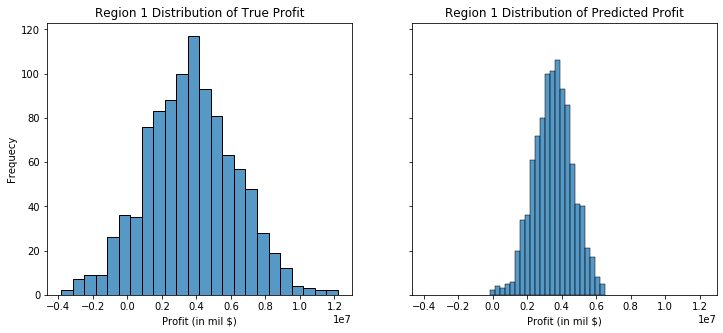

Region 2


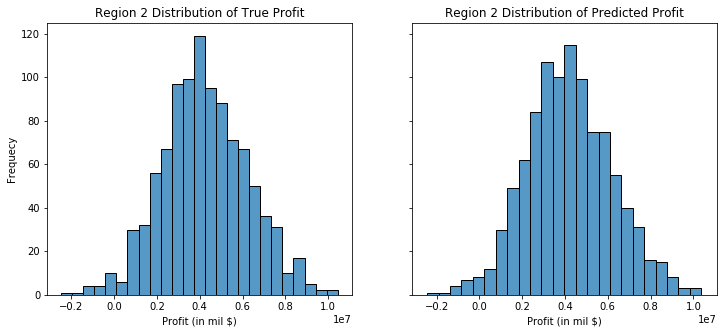

Region 3


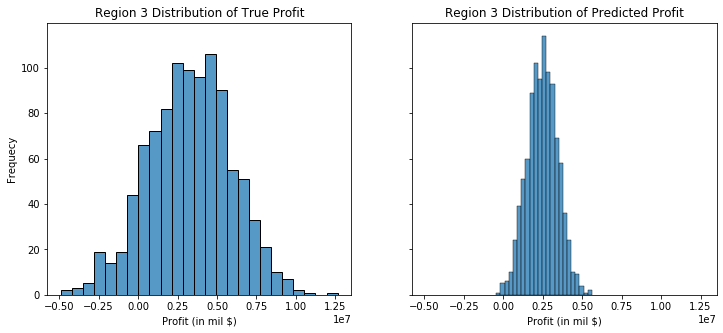

In [34]:
r = 1
for reg_dict in regions_profit:
    print('Region '+str(r))
    dist_plot(df = reg_dict['profit_df'], location = r,  size = [12, 5])
    r += 1

#### Conclusion: Bootstrapping Distributions

1) The distributions for predicted profits in regions 1 and 3 vary greatly from the true profit distributions

2) Region 2's predictions were the most accurate amongst all the models

### Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage

In [40]:
#Average Profit
r = 1
for reg_dict in regions_profit:
    print('The Average Profit for Region'+str(r)+':\n True Profit: $',round((reg_dict['average_profit'][0] / 1000000), 2),'mil.\n Pred Profit: $',round((reg_dict['average_profit'][1] / 1000000), 2),'mil.')
    r += 1
    print()

The Average Profit for Region1:
 True Profit: $ 3.69 mil.
 Pred Profit: $ 3.54 mil.

The Average Profit for Region2:
 True Profit: $ 4.23 mil.
 Pred Profit: $ 4.2 mil.

The Average Profit for Region3:
 True Profit: $ 3.28 mil.
 Pred Profit: $ 2.48 mil.



#### Conclusion: Average Profit

1) Region 1 had the highest profit

2) Region 1 also had the most identical values in true and predicted profit values

In [37]:
r = 1
for reg_dict in regions_profit:
    print('95% Confidence Interval Region'+str(r)+':\n Lower Bound:',
          round(reg_dict['confidence_interval'][0], 2),'\n Upper Bound:',
          round(reg_dict['confidence_interval'][1], 2))    
    r += 1
    print()

95% Confidence Interval Region1:
 Lower Bound: 3526336.35 
 Upper Bound: 3847030.25

95% Confidence Interval Region2:
 Lower Bound: 4110452.78 
 Upper Bound: 4357729.27

95% Confidence Interval Region3:
 Lower Bound: 3112531.38 
 Upper Bound: 3441200.6



#### Conclusion: Confidence Interval

1) Region 2 had the highest confidence interval

2) Region 1 is the second best followed by region 3

3) The estimates are closer for region 1 than the other two regions

In [39]:
r = 1
for reg_dict in regions_profit:
    print('Risk of Losses for Region '+str(r)+': {:.2%}'.format(reg_dict['loss_risk']))
    r += 1
    print()

Risk of Losses for Region 1: 8.40%

Risk of Losses for Region 2: 1.80%

Risk of Losses for Region 3: 10.60%



#### Conclusion: Risk Level

1) Region 2 has the lowest risk

2) Region 3 has the highest risk

### Provide findings: suggest a region for development of oil wells and justify the choice

**Region 1**

1) This region was second best in average profit, not as accurate as region 2 though

2) This seemed to be the middle choice between risk level and confidence intervals among the 3 regions

**Region 2**

1) This region had the highest average profit and the closest to the true value for average profit

2) Region 2 was considered to have the lowest risk and best confidence interval

**Region 3**

1) Region 2 had the highest risk of loss, worst confidence interval, and lowest average profit



## General Conclusion

1) Overall, OilyGiant should choose to use is region 2. It outperformed the other 2 in every metric evaluation. This should lead to high profit yields in the future.

2) The second best option would be to use region 1, as it was the middle choice.